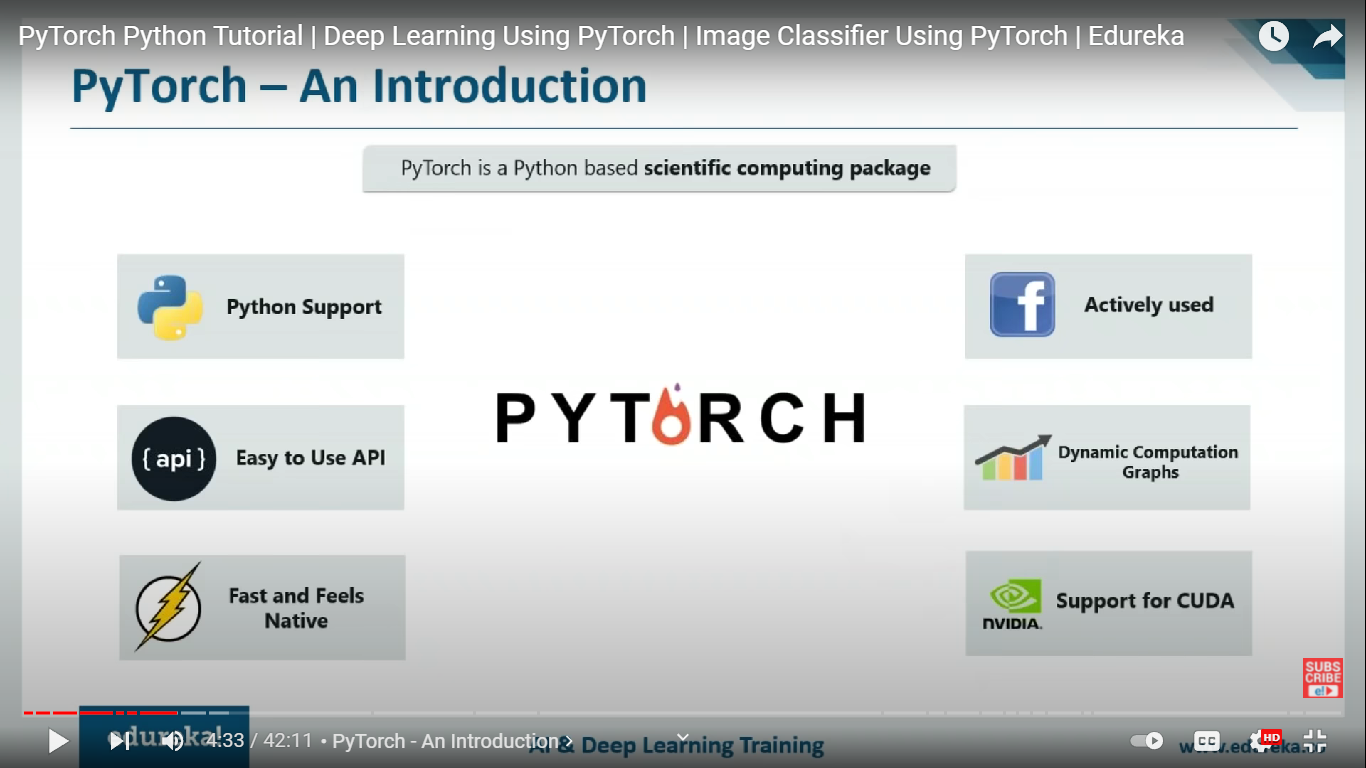

CUDA - Compute Unified Device Architecture

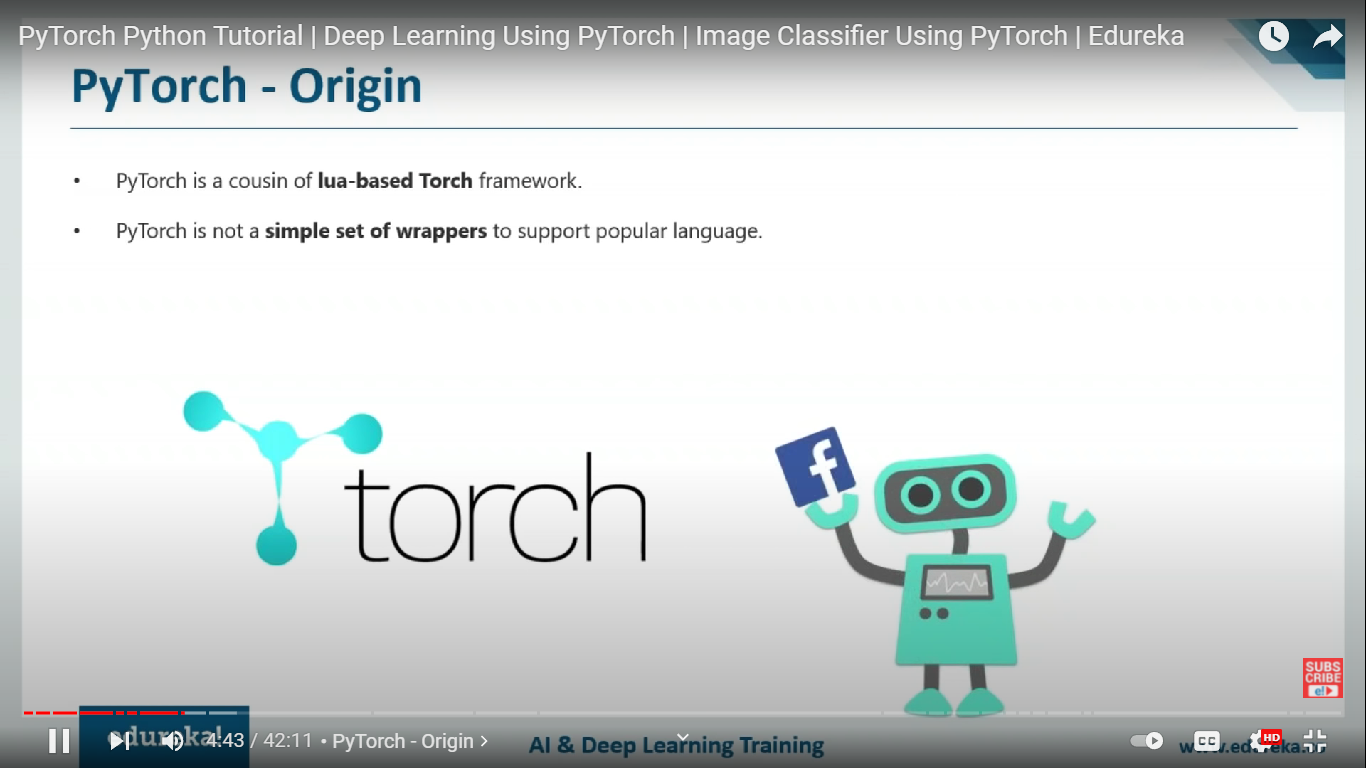

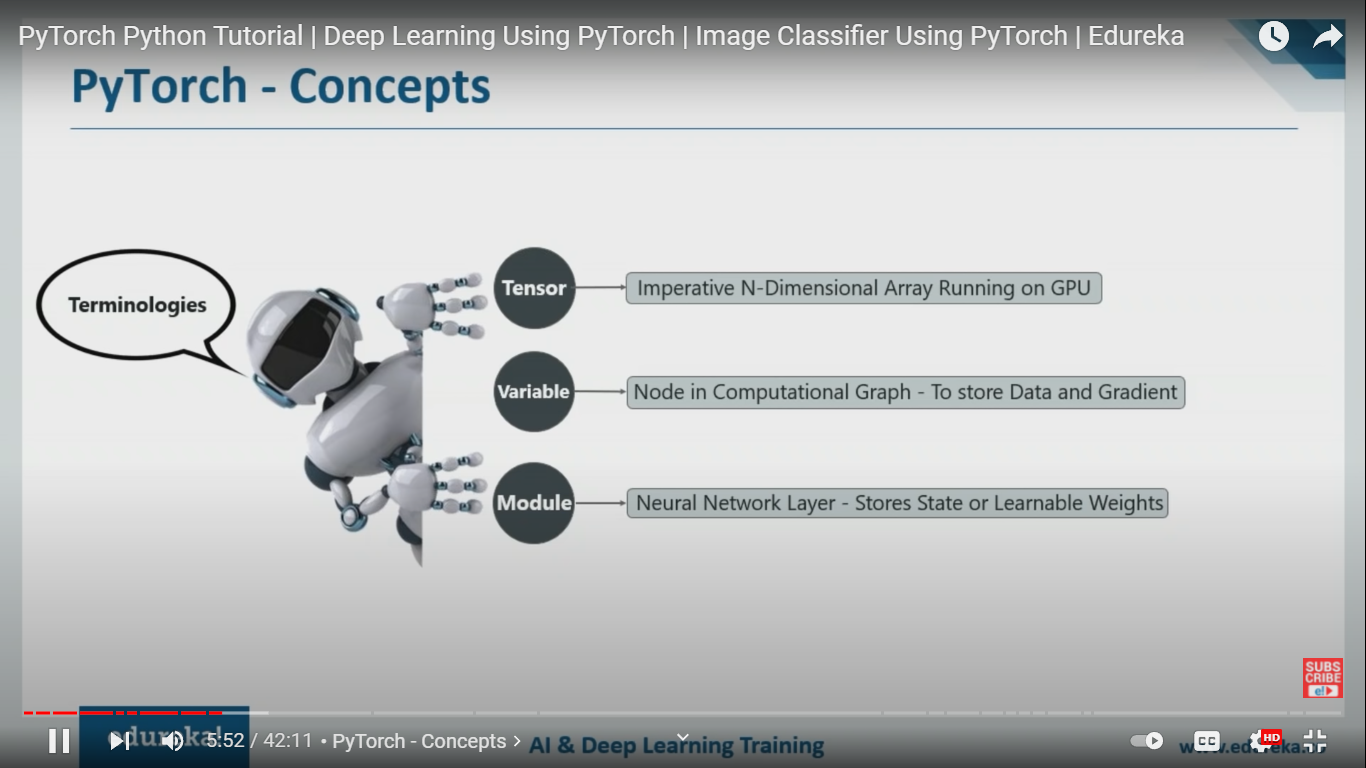

## Basics

In [ ]:
import torch

In [ ]:
x = torch.empty(5,3)
x

tensor([[-1.7363e+24,  3.0837e-41, -1.6023e+24],
        [ 3.0837e-41,  0.0000e+00,  3.0837e-41],
        [-5.2852e+24,  3.0837e-41, -5.2853e+24],
        [ 3.0837e-41, -5.2853e+24,  3.0837e-41],
        [ 5.6052e-45,  0.0000e+00,  0.0000e+00]])

In [ ]:
x = torch.rand(5,3)
x

tensor([[0.0532, 0.7916, 0.3116],
        [0.0161, 0.1531, 0.0655],
        [0.0917, 0.9691, 0.8539],
        [0.4539, 0.0105, 0.8430],
        [0.6958, 0.6330, 0.4425]])

In [ ]:
x = torch.zeros(5,3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [ ]:
x = torch.tensor([5.5,3])
x

tensor([5.5000, 3.0000])

In [ ]:
x = x.new_ones(5,3,dtype=torch.double)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [ ]:
print(x.size())

torch.Size([5, 3])


In [ ]:
y = torch.rand(5,3)
x+y

tensor([[1.0290, 1.0364, 1.2922],
        [1.9761, 1.6942, 1.1559],
        [1.9864, 1.1136, 1.1514],
        [1.8549, 1.5092, 1.8268],
        [1.2000, 1.6276, 1.6909]], dtype=torch.float64)

In [ ]:
 torch.add(x,y)

tensor([[1.0290, 1.0364, 1.2922],
        [1.9761, 1.6942, 1.1559],
        [1.9864, 1.1136, 1.1514],
        [1.8549, 1.5092, 1.8268],
        [1.2000, 1.6276, 1.6909]], dtype=torch.float64)

In [ ]:
x = torch.randn(4,4)
x

tensor([[ 0.8203, -2.0616, -1.1747, -0.6354],
        [-0.2840,  0.2800, -0.6010,  0.5150],
        [ 1.3411, -0.0636,  0.0661, -0.1753],
        [ 2.0955,  0.9585,  0.9527,  0.6225]])

In [ ]:
x.view(16)

tensor([ 0.8203, -2.0616, -1.1747, -0.6354, -0.2840,  0.2800, -0.6010,  0.5150,
         1.3411, -0.0636,  0.0661, -0.1753,  2.0955,  0.9585,  0.9527,  0.6225])

In [ ]:
x.view(-1,8)

tensor([[ 0.8203, -2.0616, -1.1747, -0.6354, -0.2840,  0.2800, -0.6010,  0.5150],
        [ 1.3411, -0.0636,  0.0661, -0.1753,  2.0955,  0.9585,  0.9527,  0.6225]])

In [ ]:
x = torch.randn(1)
x

tensor([0.8430])

In [ ]:
x.item()

0.8429758548736572

## CUDA


In [ ]:
torch.cuda.is_available()

False

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  y = torch.ones_like(x, device = device)
  x = x.to(device)
  z = x+y
  print(z)
  print(z.to('cpu',torch.double))

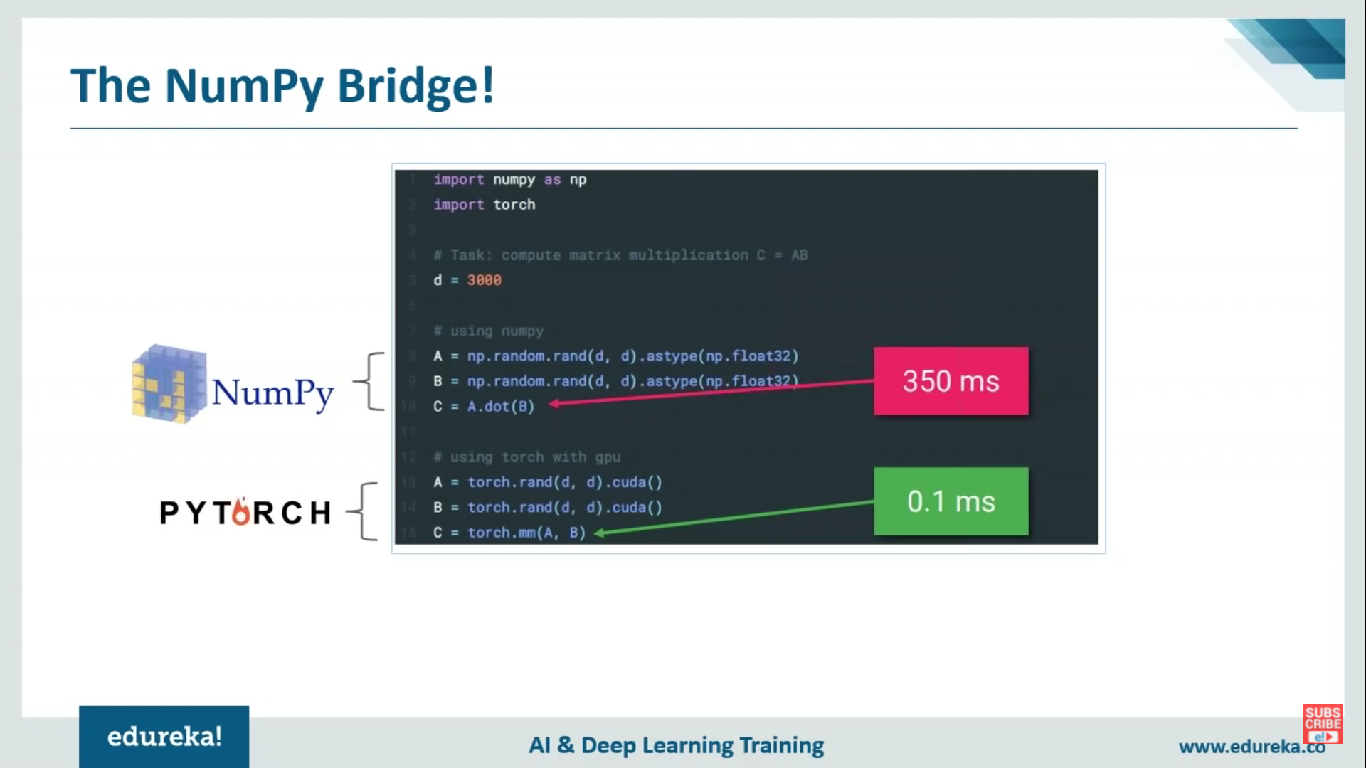

In [ ]:
import numpy as np

In [ ]:

a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [ ]:
b =a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
a.add_(1)
a,b

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

In [ ]:
a = np.ones(5)
a

array([1., 1., 1., 1., 1.])

In [ ]:
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [ ]:
np.add(a,1,out=a)
a,b

(array([2., 2., 2., 2., 2.]),
 tensor([2., 2., 2., 2., 2.], dtype=torch.float64))

## Autograd


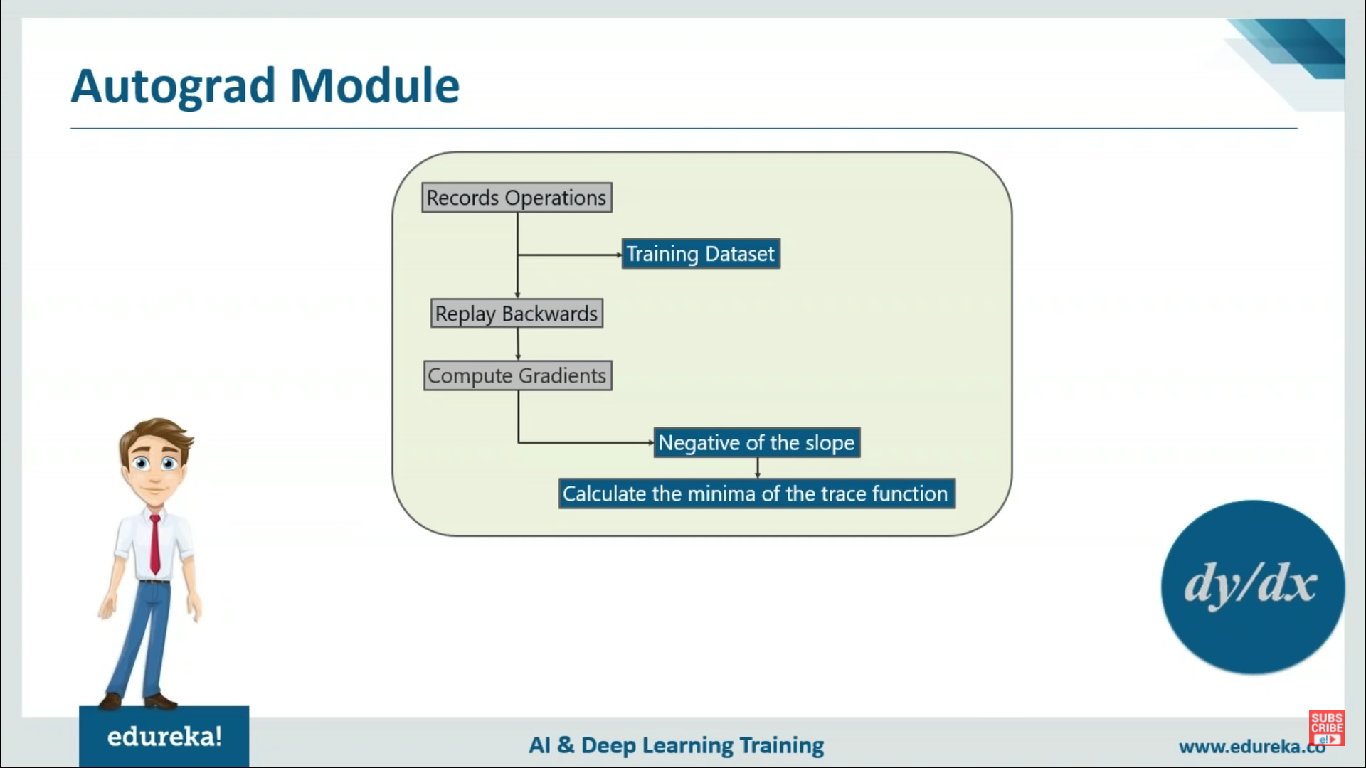

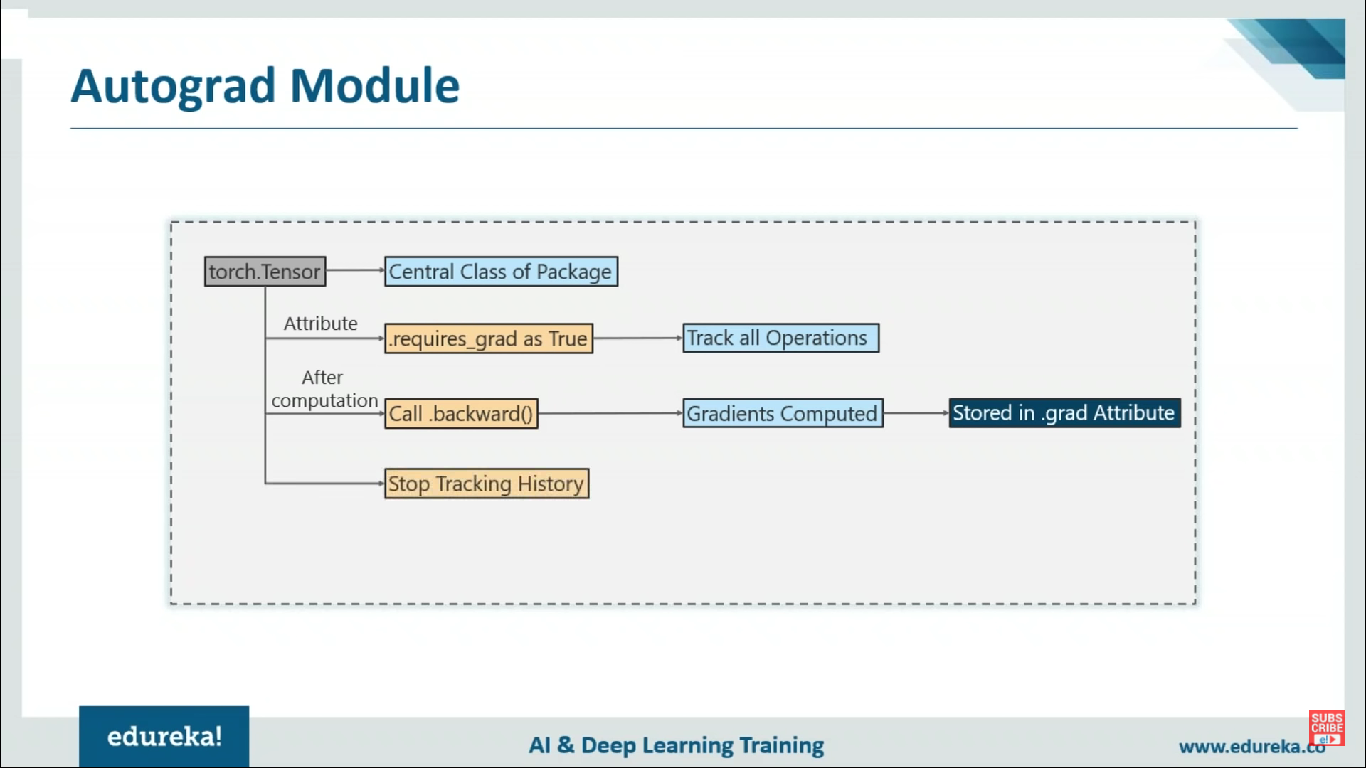

## Neural Network

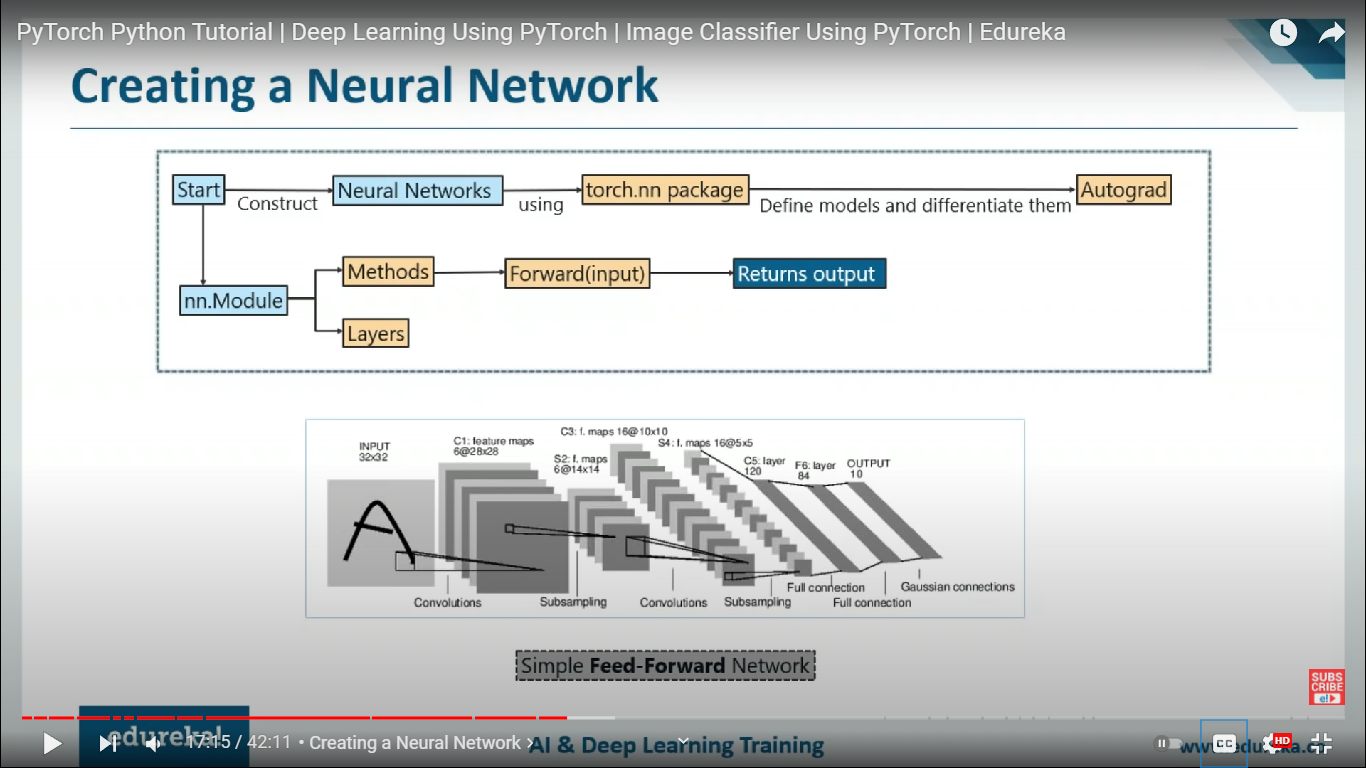

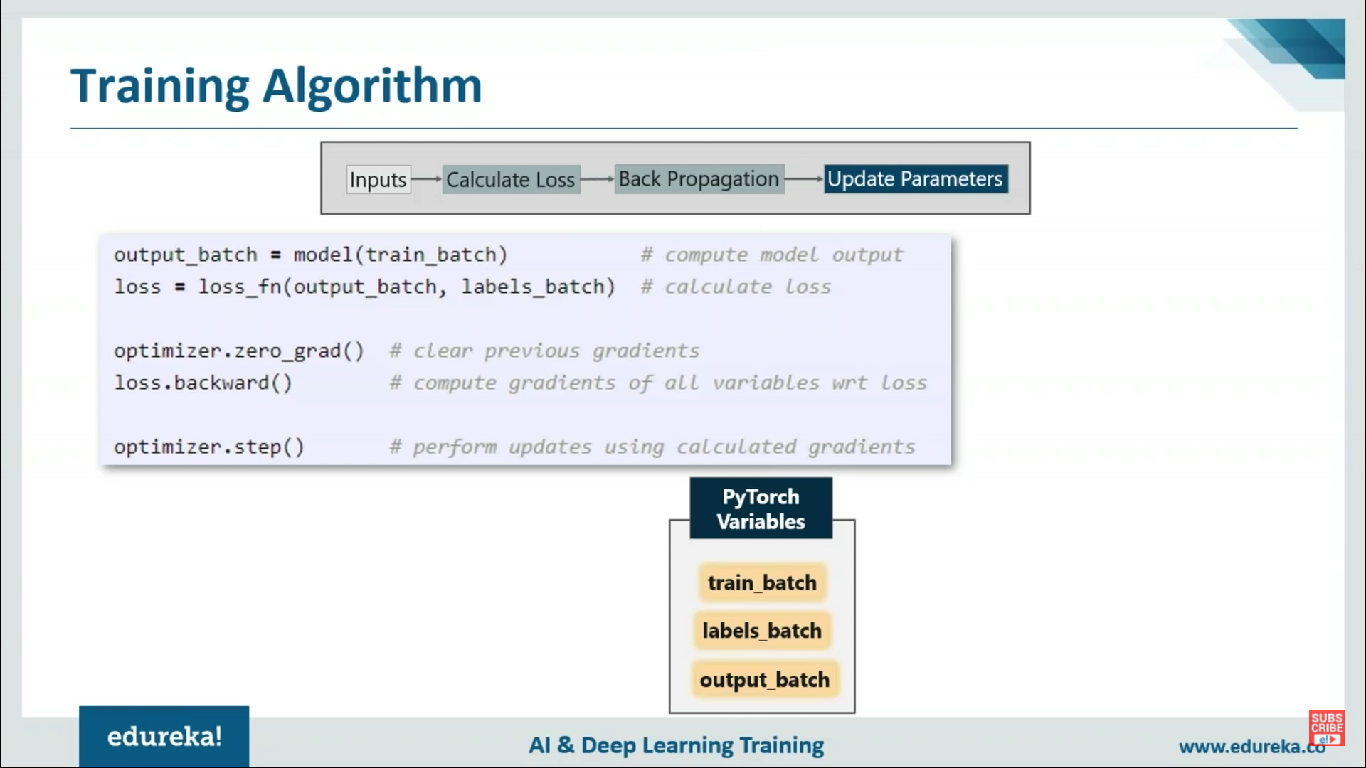

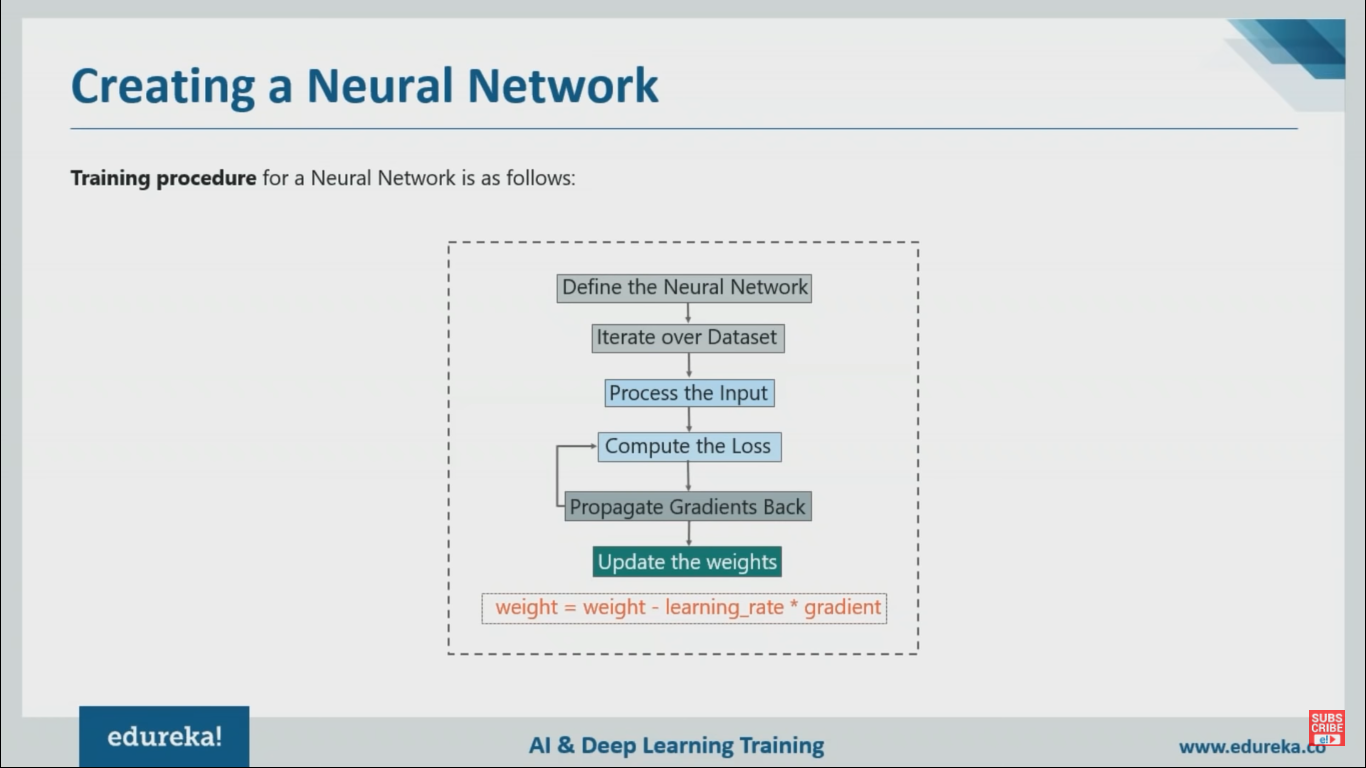

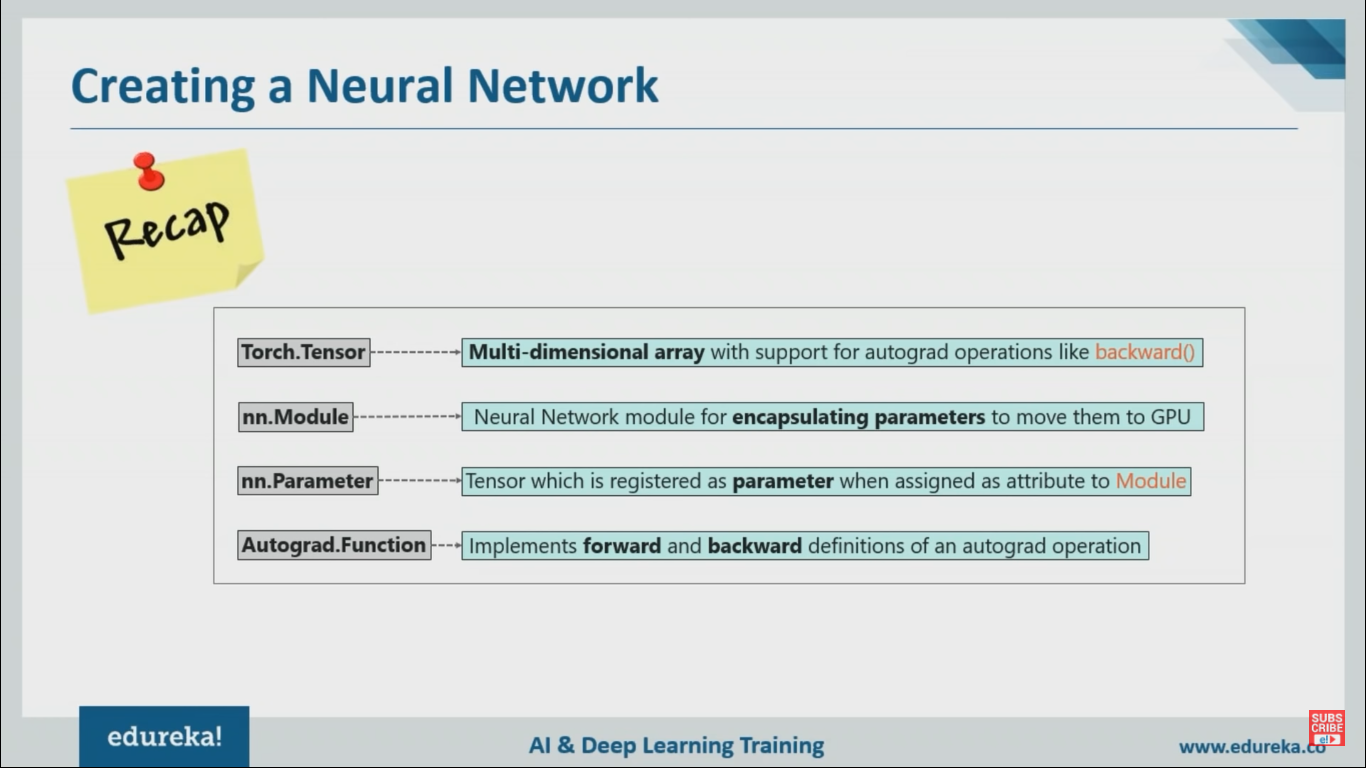

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    # 1 input image channel, 6 output channels, 5X5 square convolution
    # kernel
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    # an affine operation y=Wx+b
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  
  def forward(self,x):
    # Maxpoolig over a (2,2)window
    x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
    #If the size is square you can only specify one number
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self,x):
    size = x.size()[1:]# all dimensions except batch
    num_features = 1
    for s in size:
      num_features *=s
    return num_features

net = Net()
print(net)




Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [ ]:
inp = torch.randn(1,1,32,32)
out = net(inp)
print(out)

RuntimeError: ignored

In [ ]:
net.zero_grad()
out.backward(torch.randn(1,10))

In [ ]:
target = torch.randn(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

loss = criterion(out,target)
print(loss)

In [ ]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) 

### Backward

In [ ]:
net.zero_grad()

In [ ]:
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

In [ ]:
loss.backward()

In [ ]:
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

## SGD

In [ ]:
# learning_rate = 0.01

# for f in net.parameters():
#   f.data.sub_(f.grad.data * learning_rate)


In [ ]:
import torch.optim as optim
opt = optim.SGD(net.parameters(), lr = 0.01)

opt.zero_grad()
op= net(inp)
loss = criterion(op,target)
loss.backward()
opt.step()

At this point, we have covered:
1. Defining a Neural Network
2. Proessing inputs and calling backwards
3. Computing the loss
4. Updating the weighrs of the network

PYTorch vs Tensorflow

Computational Graphs - Dynamic / Static

make use of Standard Python Flow control - an/cannot

Support for Python Debuggers - Can / Cannot

Dynamic inspection of variables and gradients - Can/Cannot

Purpose - Research/Production

Builtby - Facebook/Google

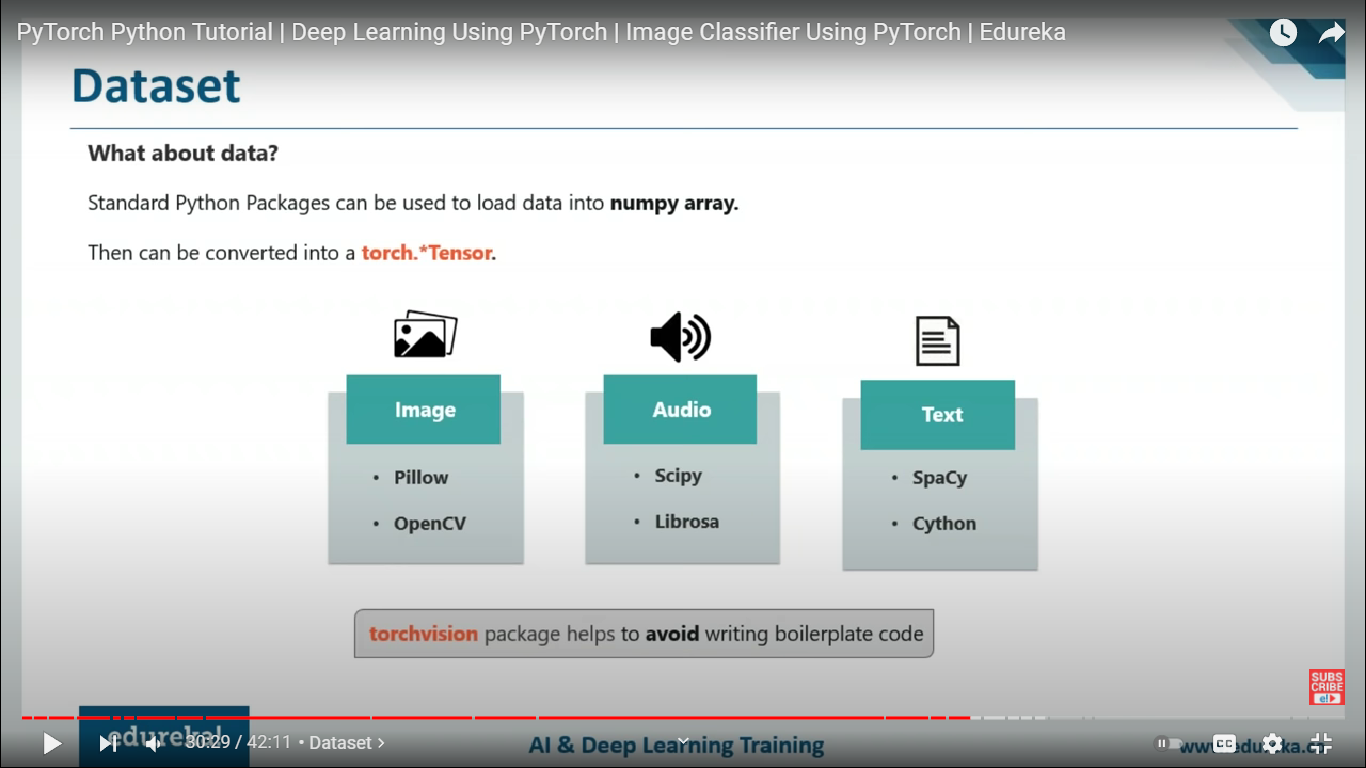

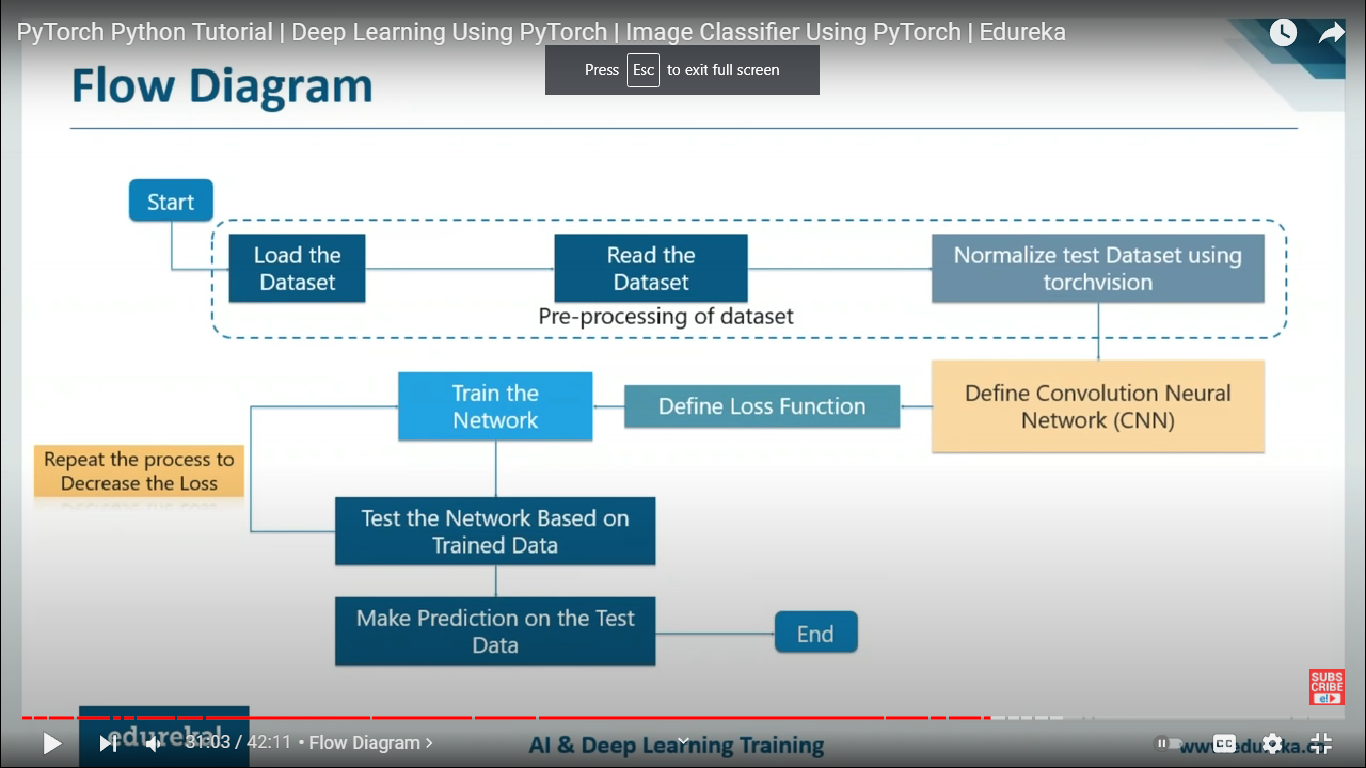

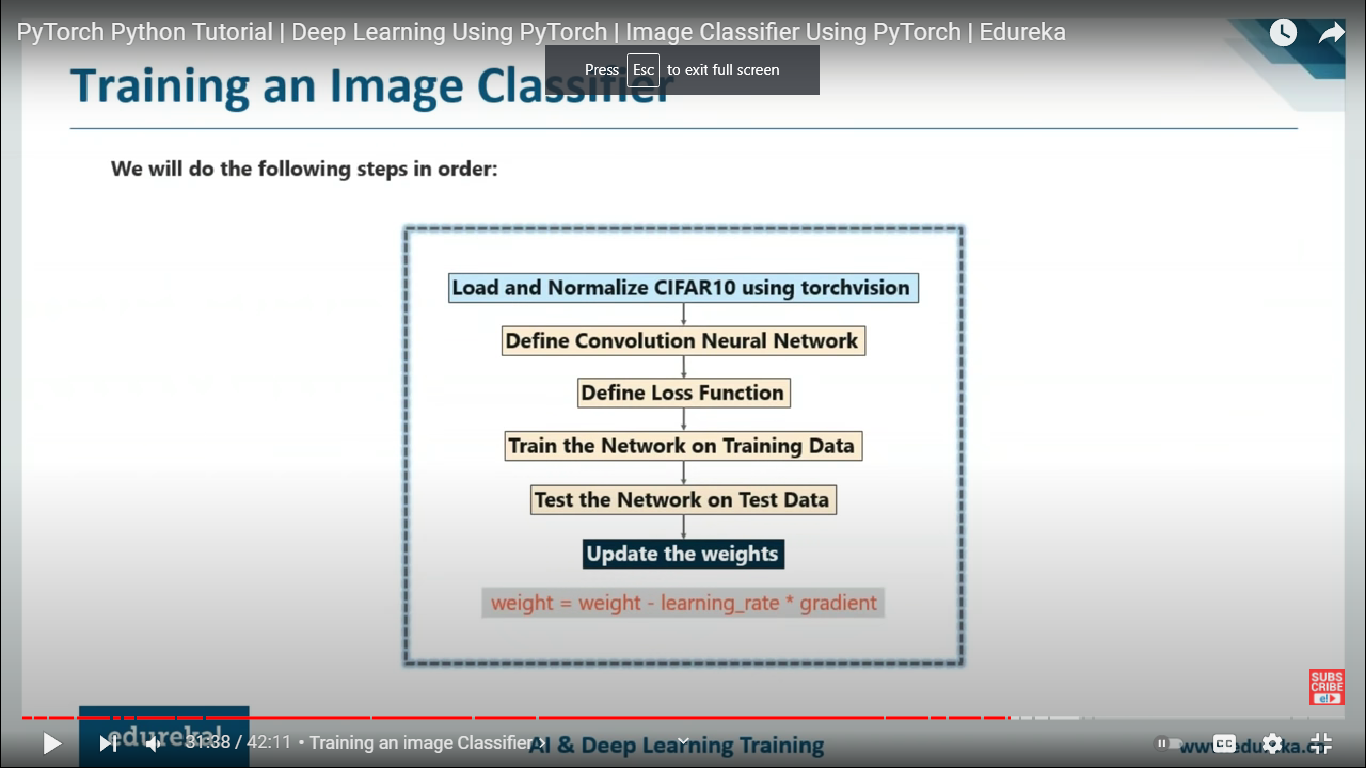

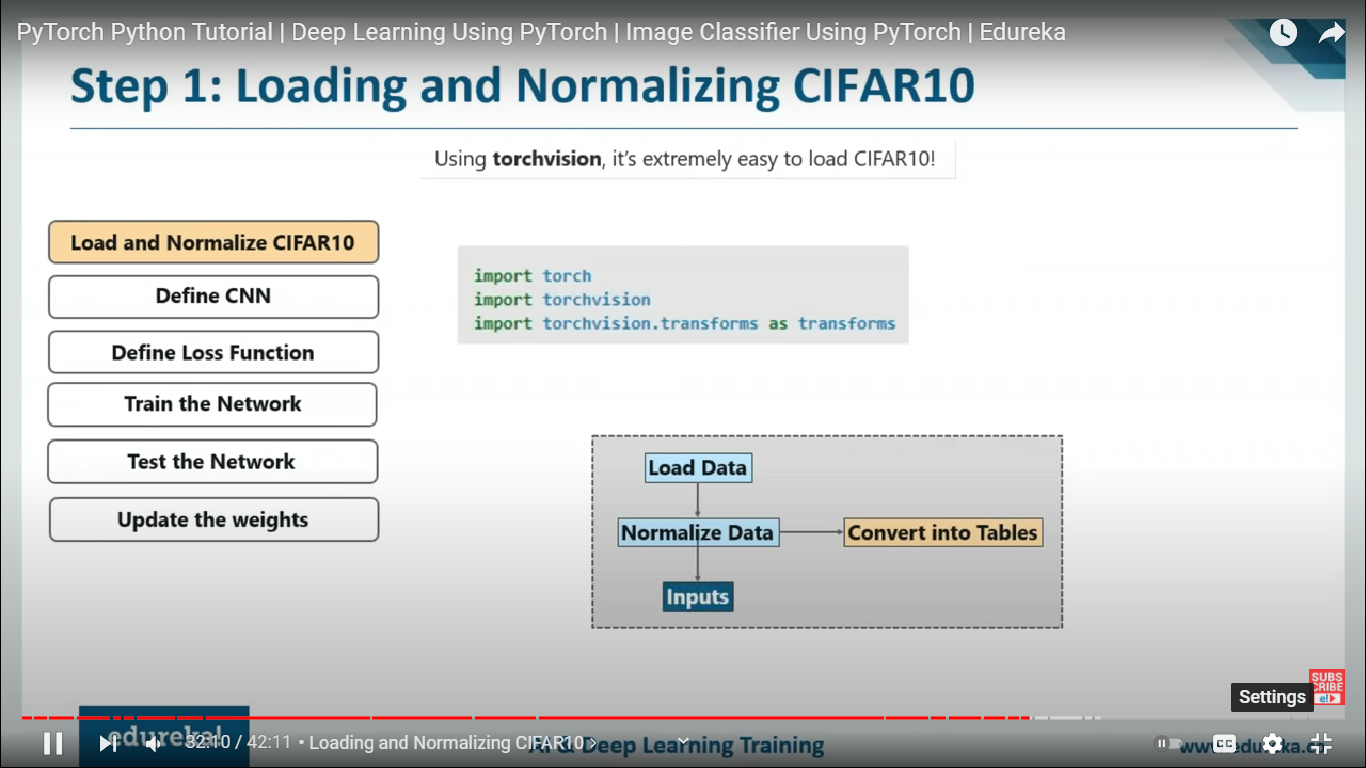

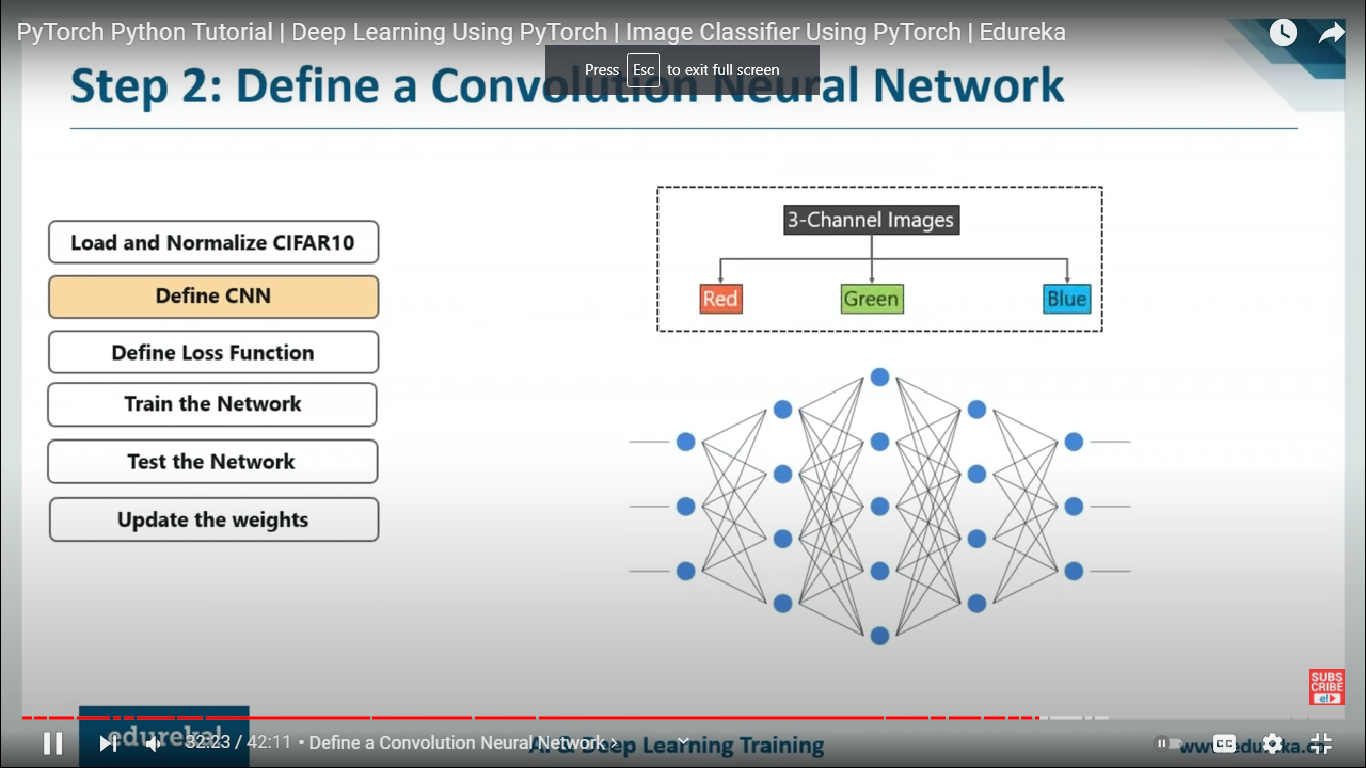

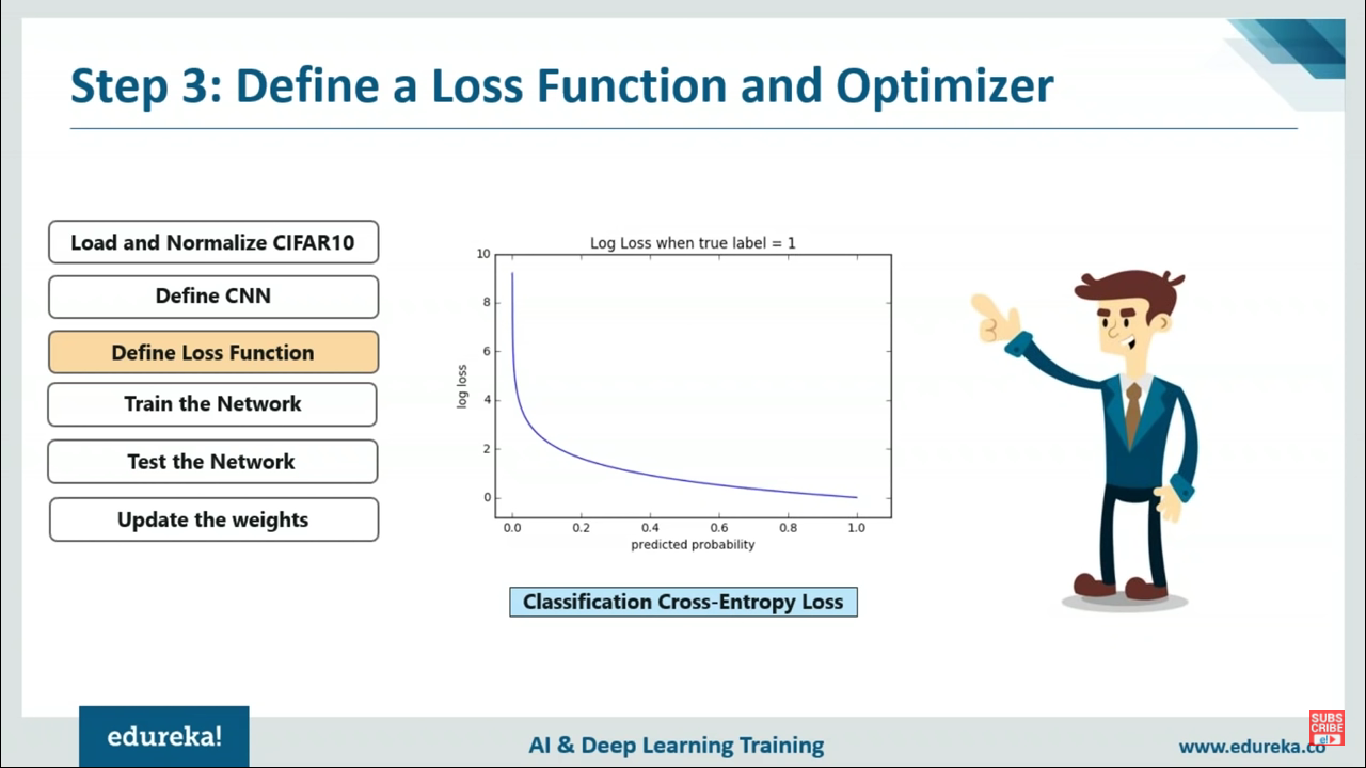

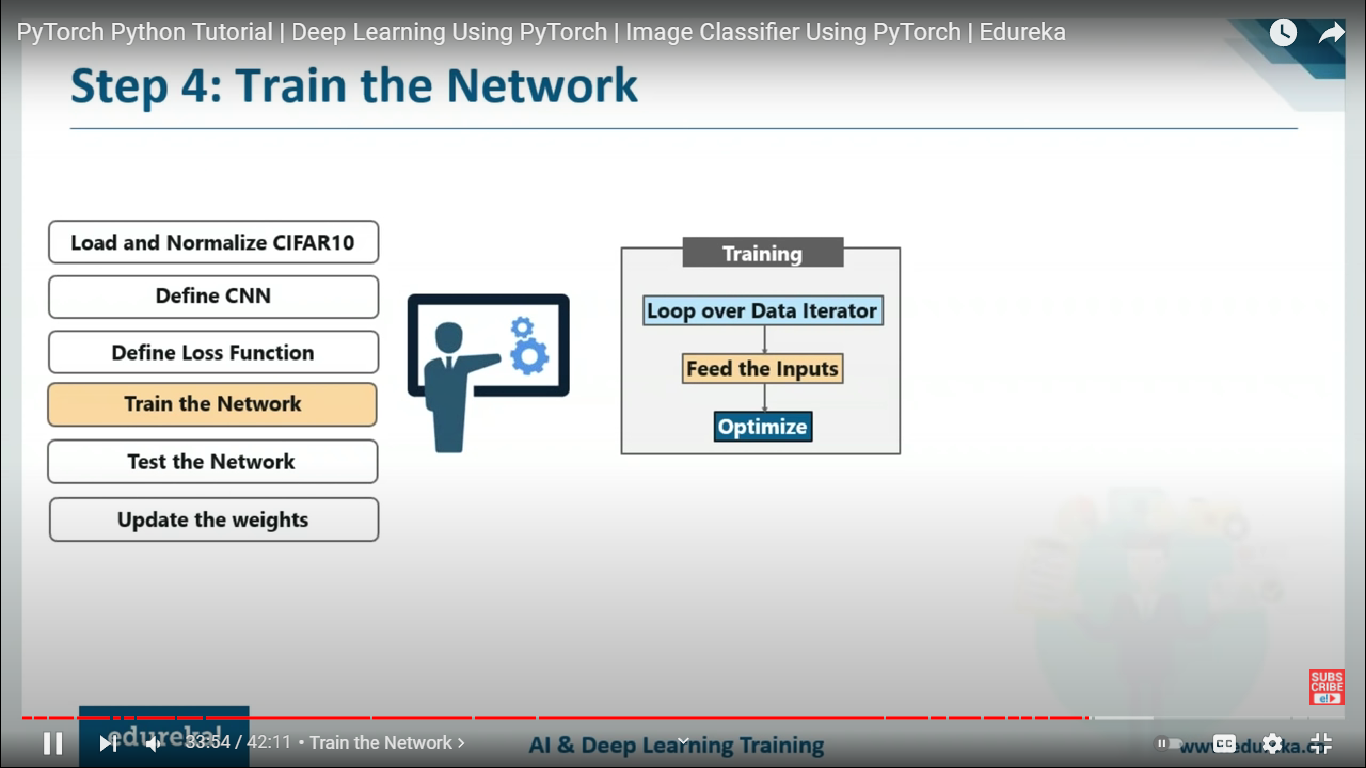

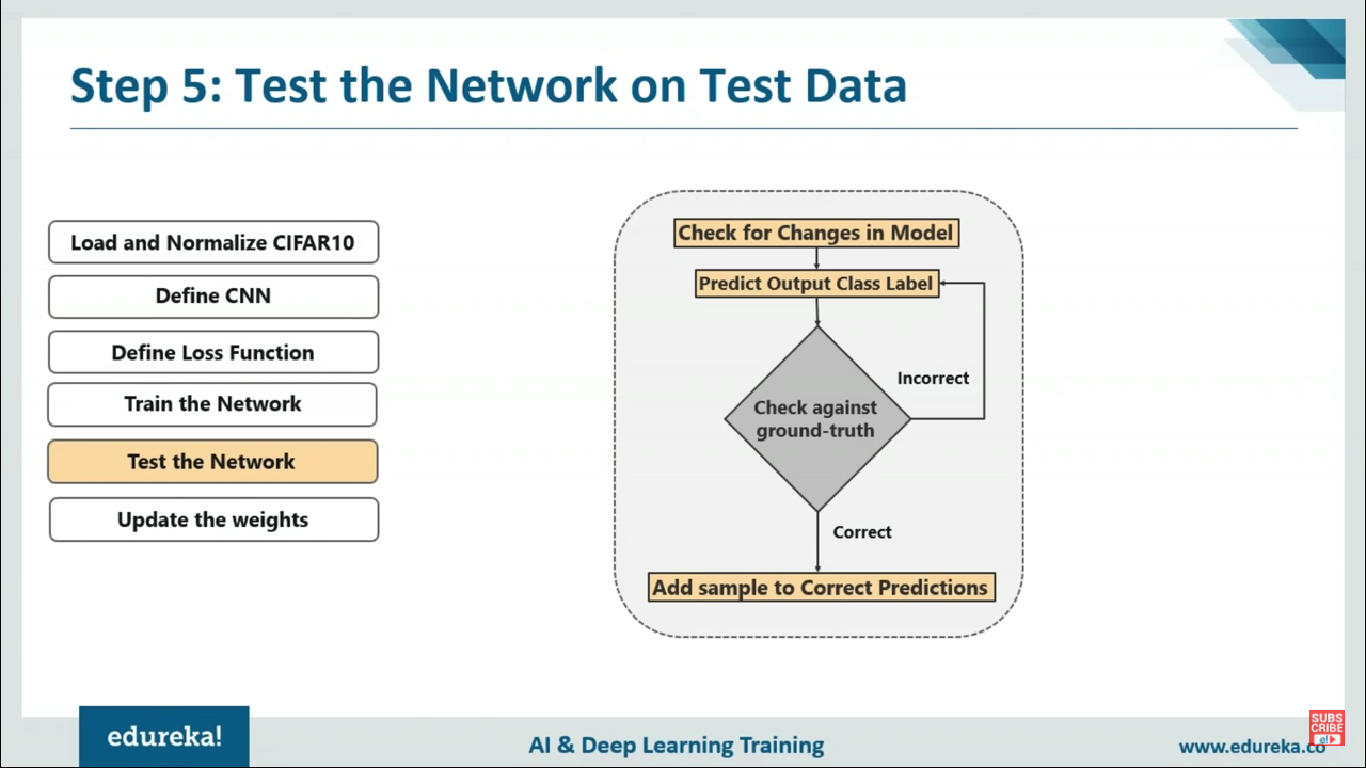

## Pytorch for cifar10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

In [3]:
batch_size = 4

In [4]:
trainset = torchvision.datasets.CIFAR10(root = './data',
                                        train = True,
                                        download = True,
                                        transform = transform
)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle = True,
                                          num_workers = 2
)

testset = torchvision.datasets.CIFAR10(root = './data',
                                        train = False,
                                        download = True,
                                        transform = transform
)


testloader = torch.utils.data.DataLoader(testset,
                                          batch_size=batch_size,
                                          shuffle = False,
                                          num_workers = 2
)



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def imshow(img):
  img = img/2 +0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()


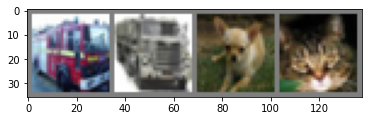

truck truck dog   cat  


In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Define CNN

In [9]:
import torch.nn as nn
import torch.nn.functional as F


In [10]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)


  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
net = Net()


## Loss function

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters(),lr = 0.001,momentum = 0.9)


## train network

In [12]:
for epoch in range(2):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels = data
    opt.zero_grad()
    op = net(inputs) 
    loss = criterion(op,labels)
    loss.backward()
    opt.step()

    running_loss +=loss.item()
    if i%2000 == 1999:
      print(f'[{epoch+1},{i+1:5d}] loss:{running_loss/2000:.3f}')
      running_loss = 0.0
  
print('Finished training')


[1, 2000] loss:2.212
[1, 4000] loss:1.858
[1, 6000] loss:1.686
[1, 8000] loss:1.561
[1,10000] loss:1.532
[1,12000] loss:1.455
[2, 2000] loss:1.388
[2, 4000] loss:1.342
[2, 6000] loss:1.333
[2, 8000] loss:1.339
[2,10000] loss:1.296
[2,12000] loss:1.270
Finished training


In [13]:
path = '/content/sample_data/cifar_net.pth'
torch.save(net.state_dict(),path)

## Test network

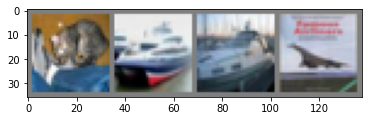

In [14]:
dataiter = iter(testloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [15]:
print('Ground truth: ',' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Ground truth:  cat   ship  ship  plane


In [16]:
net = Net()
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [17]:
outputs = net(images)

In [18]:
_,predicted = torch.max(outputs,1)
print('Predicted: ',' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   car   car   plane


In [20]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images,labels = data
    outputs = net(images)
    _,pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct+=(pred == labels).sum().item()

print(f'Accuracy of the network on the 1000 test images:{100 * correct / total}%')


Accuracy of the network on the 1000 test images:56.93%


In [21]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
  for data in testloader:
    images,labels = data
    outputs = net(images)
    _,pred = torch.max(outputs,1)
    for label,prediction in zip(labels,pred):
      if label == prediction:
        correct_pred[classes[label]]+=1
      total_pred[classes[label]]+=1

for classname,correct_count in correct_pred.items():
  acc = 100 * float(correct_count)/total_pred[classname]
  print(f'Accuracy for class: {classname:5s} is {acc:.1f}%')

Accuracy for class: plane is 54.0%
Accuracy for class: car   is 67.9%
Accuracy for class: bird  is 37.5%
Accuracy for class: cat   is 32.8%
Accuracy for class: deer  is 44.3%
Accuracy for class: dog   is 63.7%
Accuracy for class: frog  is 71.3%
Accuracy for class: horse is 59.6%
Accuracy for class: ship  is 72.2%
Accuracy for class: truck is 66.0%


In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
